**Time-Series Forecasting: Predicting Stock Prices Using An seq to seq Model**

In [46]:
import math
import matplotlib.pyplot as plt
import keras
import pandas as pd
import numpy as np
from keras.models import Sequential
from keras.layers import Dense,LSTM,Dropout
from keras.layers import *
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error,mean_absolute_error
from sklearn.model_selection import train_test_split
from keras.callbacks import EarlyStopping

In [2]:
df2 = pd.read_csv('TSLA.csv')

### الداتا بتتكلم عن سعر اسهم شركه تسلا خلال 800 يوم
* data: يعنى اليوم
* open: اول مفتح البنك كان سعر السهم بكام
* high: اعلى سعر للسهم فى اليوم ده كان كام
* low: اقل سعر للسهم فى اليوم ده كان كام
* close: لما البنك قفل سعر السهم وقف عند كام
* Adj Close: متوسط سعر السهم اليوم ده
* volume: حجم الاقبال على السهم فى اليوم ده

In [4]:
print('Number of rows and columns:', df2.shape)
df2.head(5)

Number of rows and columns: (1259, 7)


,Date,Open,High,Low,Close,Adj Close,Volume
0,2015-07-10,52.444000,52.599998,51.563999,51.830002,51.830002,13054500
1,2015-07-13,52.450001,52.509998,51.209999,52.431999,52.431999,14801500
2,2015-07-14,52.419998,53.198002,52.102001,53.130001,53.130001,9538000
3,2015-07-15,53.348000,53.498001,52.416000,52.627998,52.627998,10108000
4,2015-07-16,52.844002,53.439999,52.632000,53.335999,53.335999,8080000


* هاخد اول 800 يوم للتريننج والباقى للتيست
* هشتغل على اي فيتشر وليكن السعر وقت مفتح البنك

In [16]:
training_set = df2.iloc[:800, 1:2].values
test_set = df2.iloc[800:, 1:2].values

In [17]:
training_set[:4]

array([[52.444   ],
       [52.450001],
       [52.419998],
       [53.348   ]])

In [18]:
# Feature Scaling
sc = MinMaxScaler(feature_range = (0, 1))
training_set_scaled = sc.fit_transform(training_set)

* الفيتشر عندي بالشكل ده
<center>
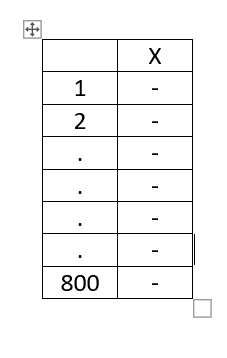
</center>
* انا هقسم ستينات
<center>
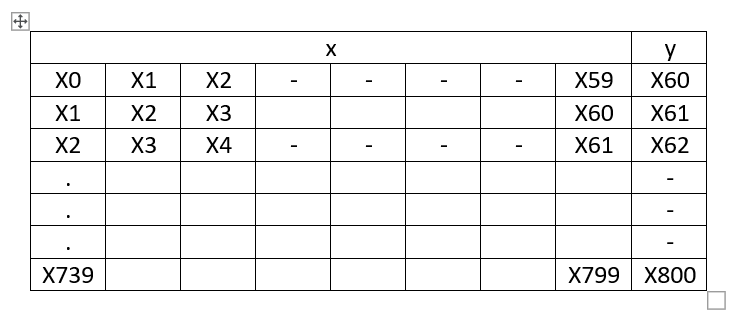
</center>
* بمعنى هاخد اول 60 يوم كانبوت والاوتبوت اليوم ال 61 بعد كده هاخد تاني 60 يوم والاوتبوت 61 وهكذا

In [19]:
# Creating a data structure with 60 time-steps and 1 output
X_train = []
y_train = []
for i in range(60, 800):
    X_train.append(training_set_scaled[i-60:i, 0])
    y_train.append(training_set_scaled[i, 0])
X_train, y_train = np.array(X_train), np.array(y_train)
X_train = np.reshape(X_train, (X_train.shape[0], X_train.shape[1], 1))
#(740, 60, 1)

#### return_sequences = True 
* ده الماضي بتاعى
* ممكن اخليه بفولس واعتمد بس على الانبوت
* وقتها مش هحتاج ال rnn

* RNN
![Loading animation](https://miro.medium.com/max/1400/1*WMnFSJHzOloFlJHU6fVN-g.gif)

* LSTM
![Loading animation](https://miro.medium.com/max/1400/1*VOXRGhOShoWWks6ouoDN3Q.gif)

* GRU
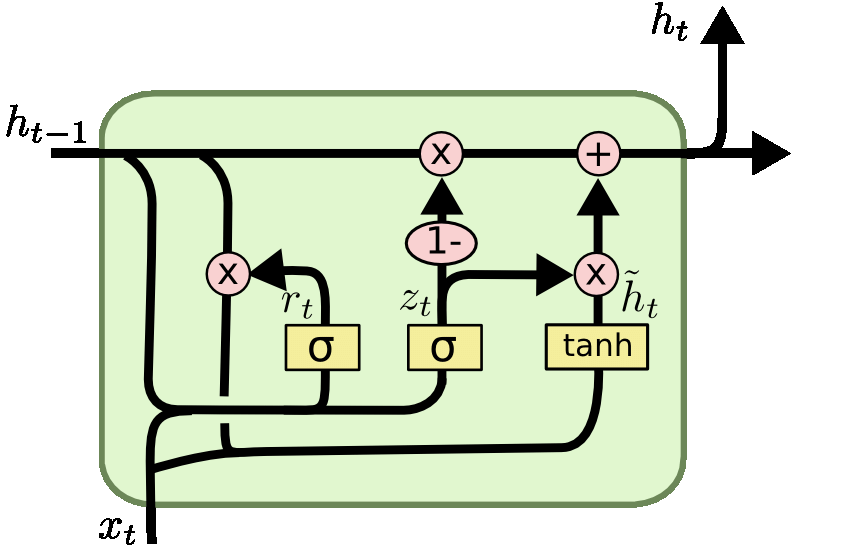

In [27]:
model = Sequential()
#Adding the first LSTM layer and some Dropout regularisation

#model.add(LSTM(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(SimpleRNN(units = 50, return_sequences = True, input_shape = (X_train.shape[1], 1)))
model.add(Dropout(0.2))

# Adding a second LSTM layer and some Dropout regularisation
#model.add(LSTM(units = 50, return_sequences = True))
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a third LSTM layer and some Dropout regularisation
#model.add(LSTM(units = 50, return_sequences = True))
model.add(SimpleRNN(units = 50, return_sequences = True))
model.add(Dropout(0.2))

# Adding a fourth LSTM layer and some Dropout regularisation
#model.add(LSTM(units = 50))
model.add(SimpleRNN(units = 50))
model.add(Dropout(0.2))

# Adding the output layer
model.add(Dense(units = 1))

# Compiling the RNN
model.compile(optimizer = 'adam', loss = 'mean_squared_error')

# Fitting the RNN to the Training set
model.fit(X_train, y_train, epochs = 50, batch_size = 32)

Epoch 1/50


C:\Users\hossam\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:199: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


24/24 ━━━━━━━━━━━━━━━━━━━━ 7s 50ms/step - loss: 0.0686
Epoch 2/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0151
Epoch 3/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 52ms/step - loss: 0.0127
Epoch 4/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0129
Epoch 5/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 2s 61ms/step - loss: 0.0117 
Epoch 6/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0119
Epoch 7/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 57ms/step - loss: 0.0119
Epoch 8/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 55ms/step - loss: 0.0102
Epoch 9/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0104
Epoch 10/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 51ms/step - loss: 0.0115 
Epoch 11/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 56ms/step - loss: 0.0092
Epoch 12/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0092
Epoch 13/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0092
Epoch 14/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 54ms/step - loss: 0.0089
Epoch 15/50
24/24 ━━━━━━━━━━━━━━━━━━━━ 1s 53ms/step - loss: 0.0089
Epoch 16/50
2

### test data
<center>
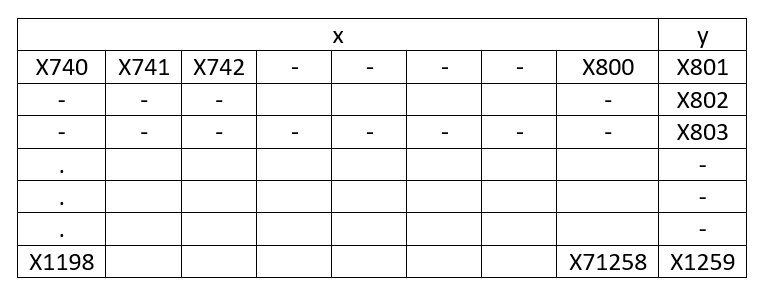
</center>
* ده معناه ان اخر 60 فى الترين هاخدهم معايا

In [28]:
# Getting the predicted stock price of 2017
dataset_train = df2.iloc[:800, 1:2]
dataset_test = df2.iloc[800:, 1:2]
dataset_total = pd.concat((dataset_train, dataset_test), axis = 0)
inputs = dataset_total[len(dataset_total) - len(dataset_test) - 60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
X_test = []
for i in range(60, 519):
    X_test.append(inputs[i-60:i, 0])
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
print(X_test.shape)
# (459, 60, 1)

(459, 60, 1)


In [29]:
predicted_stock_price = model.predict(X_test)
predicted_stock_price = sc.inverse_transform(predicted_stock_price)

15/15 ━━━━━━━━━━━━━━━━━━━━ 1s 61ms/step 


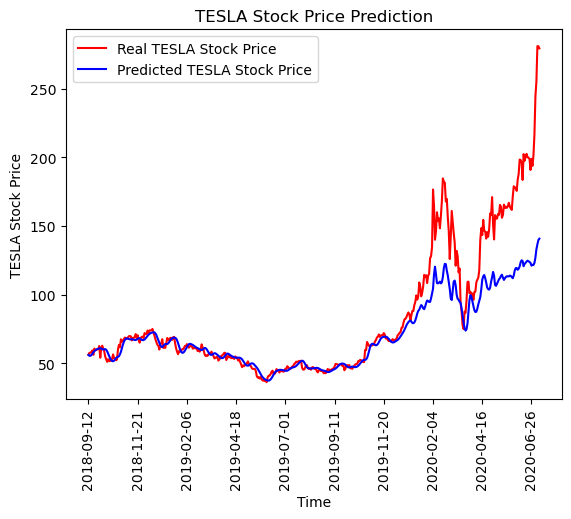

In [30]:
# Visualising the results
plt.plot(df2.loc[800:, 'Date'],dataset_test.values, color = 'red', label = 'Real TESLA Stock Price')
plt.plot(df2.loc[800:, 'Date'],predicted_stock_price, color = 'blue', label = 'Predicted TESLA Stock Price')
plt.xticks(np.arange(0,459,50),rotation=90)
plt.title('TESLA Stock Price Prediction')
plt.xlabel('Time')
plt.ylabel('TESLA Stock Price')
plt.legend()
plt.show()

In [46]:
print(sc.inverse_transform(model.predict(np.array([inputs[0:60]]))))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
[[56.022297]]


In [49]:
sc.inverse_transform([inputs[61]])

array([[57.604]])

**Predicting next word Using An seq to seq Model**

### alice in wonder land

In [89]:
# extract the input as a stream of characters
fin = open("wonderland.txt", 'rb')
lines = []
for line in fin:
    line = line.strip().lower()
    line = line.decode("ascii", "ignore")
    if len(line) == 0:
        continue
    lines.append(line)
fin.close()
text = " ".join(lines)

In [90]:
from tensorflow.keras.preprocessing.text import Tokenizer

In [91]:
# --- Tokenize text ---
tokenizer = Tokenizer(num_words=2000)
tokenizer.fit_on_texts([text])
total_words = len(tokenizer.word_index) + 1

print("Total unique words:", total_words)

Total unique words: 3093


In [92]:
#print(tokenizer.index_word)

In [93]:
#print(tokenizer.word_index)

In [94]:
# --- Create sequences ---
input_sequences = []
for line in text.split('\n'):
    token_list = tokenizer.texts_to_sequences([line])[0]
    for i in range(2, len(token_list), 3):  # step of 3 to skip
        input_sequences.append(token_list[:i+1])

print("Total sequences:", len(input_sequences))

Total sequences: 9594


In [95]:
input_sequences[:2]

[[49, 1244, 236], [49, 1244, 236, 331, 10, 461]]

In [96]:
print(input_sequences[6])

[49, 1244, 236, 331, 10, 461, 58, 786, 787, 21, 423, 31, 22, 1, 152, 5, 678, 970, 18, 42, 788]


In [97]:
for ind in input_sequences[6]:
    print(tokenizer.index_word[ind],end=" ")

project gutenbergs alices adventures in wonderland by lewis carroll this ebook is for the use of anyone anywhere at no cost 

In [98]:
from tensorflow.keras.preprocessing.sequence import pad_sequences
# --- Pad sequences ---
#max_seq_len = max(len(x) for x in input_sequences)
input_sequences = pad_sequences(input_sequences, maxlen=20, padding='pre')

In [99]:
print(input_sequences[0])

[   0    0    0    0    0    0    0    0    0    0    0    0    0    0
    0    0    0   49 1244  236]


In [7]:
from tensorflow.keras.utils import to_categorical
# --- Split predictors and label ---
X, y = input_sequences[:,:-1], input_sequences[:,-1]
y = to_categorical(y, num_classes=total_words) # one hot encoding

In [8]:
print("Input shape:", X.shape)
print("Output shape:", y.shape)

Input shape: (9594, 19)
Output shape: (9594, 3093)


### Word Embeddings
**word embeddings**: This method keeps the order of words intact as well as encodes similar words with very similar labels. It attempts to not only encode the frequency and order of words but the meaning of those words in the sentence. It encodes each word as a dense vector that represents its context in the sentence.

Unlike the previous techniques word embeddings are learned by looking at many different training examples. You can add what's called an *embedding layer* to the beggining of your model and while your model trains your embedding layer will learn the correct embeddings for words. You can also use pretrained embedding layers.

This is the technique we will use for our examples and its implementation will be showed later on.



In [101]:
from keras.models import Sequential
from keras.layers import Embedding,SimpleRNN,Dense
model = Sequential()
model.add(Embedding(total_words, 100, input_length=X.shape[1]))
model.add(SimpleRNN(150))
model.add(Dense(total_words, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

C:\Users\hossam\anaconda3\Lib\site-packages\keras\src\layers\core\embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [102]:
# --- Train ---
history = model.fit(X, y, epochs=20, verbose=1)

Epoch 1/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 5s 9ms/step - accuracy: 0.0637 - loss: 6.3772 
Epoch 2/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 11ms/step - accuracy: 0.0650 - loss: 5.8973
Epoch 3/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.0698 - loss: 5.6661
Epoch 4/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.0884 - loss: 5.3616 
Epoch 5/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1150 - loss: 4.9924
Epoch 6/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.1532 - loss: 4.5648
Epoch 7/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 9ms/step - accuracy: 0.2010 - loss: 4.1086
Epoch 8/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.2651 - loss: 3.6494
Epoch 9/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.3496 - loss: 3.1987
Epoch 10/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.4433 - loss: 2.7582
Epoch 11/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3s 10ms/step - accuracy: 0.5404 - loss: 2.3436
Epoch 12/20
300/300 ━━━━━━━━━━━━━━━━━━━━ 3

In [103]:
def predict_next_word(model, tokenizer, seed_text, max_seq_len):
    token_list = tokenizer.texts_to_sequences([seed_text])[0]
    token_list = pad_sequences([token_list], maxlen=max_seq_len-1, padding='pre')
    predicted = np.argmax(model.predict(token_list, verbose=0), axis=-1)[0]

    for word, index in tokenizer.word_index.items():
        if index == predicted:
            return word
    return ""

In [104]:
import numpy as np
seed_text = "alice was beginning to"
print(seed_text,end=" ")
for i in range(20):
    next_word = predict_next_word(model, tokenizer, seed_text, max_seq_len)
    seed_text = seed_text +" "+ next_word
    print(next_word,end=" ")

alice was beginning to her thing and it was be much two it again its wonder from the other school of a voice will 

# Task: Fine-tune an LSTM on poems

In [105]:
data = pd.read_csv(r"E:\BFCAI\2025 first term\BNU 2025\deep learning\my labs\lab 6\task\all.csv")
data.head()

,author,content,poem name,age,type
0,WILLIAM SHAKESPEARE,Let the bird of loudest lay\r\nOn the sole Ara...,The Phoenix and the Turtle,Renaissance,Mythology & Folklore
1,DUCHESS OF NEWCASTLE MARGARET CAVENDISH,"Sir Charles into my chamber coming in,\r\nWhen...",An Epilogue to the Above,Renaissance,Mythology & Folklore
2,THOMAS BASTARD,"Our vice runs beyond all that old men saw,\r\n...","Book 7, Epigram 42",Renaissance,Mythology & Folklore
3,EDMUND SPENSER,"Lo I the man, whose Muse whilome did maske,\r\...","from The Faerie Queene: Book I, Canto I",Renaissance,Mythology & Folklore
4,RICHARD BARNFIELD,"Long have I longd to see my love againe,\r\nSt...",Sonnet 16,Renaissance,Mythology & Folklore


### example output from the model
* “Love is a thing that”
* will generate a poetic continuation such as
* “cannot be touched but only felt by the heart.”

# Thanks for attention